In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("covid-variants.csv")
df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [3]:
df.shape #Rows, Columns

(100416, 6)

In [4]:
print("Number of Country: ",df['location'].nunique()) #Unique Countries

Number of Country:  121


In [5]:
print("Name of Countries: ",df['location'].unique()) #Lists of Unique Countries

Name of Countries:  ['Angola' 'Argentina' 'Aruba' 'Australia' 'Austria' 'Bahrain' 'Bangladesh'
 'Belgium' 'Belize' 'Benin' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Curacao' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Latvia' 'Lebanon' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Malta'
 'Mauritius' 'Mexico' 'Moldova' 'Monaco' 'Mongolia' 'Montenegro' 'Morocco'
 'Mozambique' 'Nepal' 'Netherlands' 'New Zealand' 'Nigeria'
 'North Macedonia' 'Norway' 'Oman' 'Pakistan' 'Papua New Guinea'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Roma

In [7]:
variant_types = df['variant'].nunique() #Unique Variants
print("Total Variants:", variant_types)

Total Variants: 24


In [8]:
variant_names = df['variant'].unique() #Lists of Unique Variants
variant_names

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [10]:
df.groupby(['location']).sum()

,num_sequences,perc_sequences,num_sequences_total
location,,,
Angola,1325,3507.65,25320
Argentina,10689,6837.93,201864
Aruba,3302,3002.21,72000
Australia,62668,6502.24,1132776
Austria,14627,6356.05,301920
...,...,...,...
United States,2420758,6738.15,49960248
Uruguay,1189,4592.69,16368
Vietnam,1811,2350.00,43320


In [18]:
#Filtering by Locations
locale = df.groupby(['location']).sum()
#Removing All Columns Except Location & num_sequences_total
top_locales = locale.num_sequences_total.sort_values(ascending=False).head()
#Putting the Resultant in a DataFrame
df_locales = pd.DataFrame(top_locales)
df_locales
#Assigning a variable to new DataFrame
df_top_locales = df_locales.reset_index()
df_top_locales

,location,num_sequences_total
0,United States,49960248
1,United Kingdom,37427568
2,Germany,7851432
3,Denmark,6728880
4,Canada,4365240


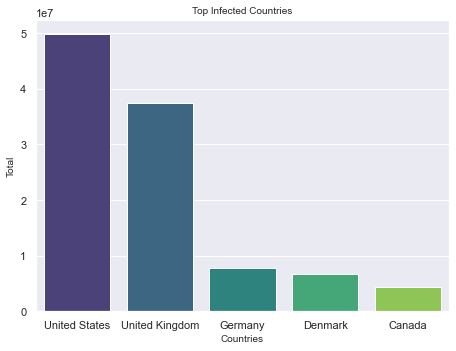

In [65]:
#Graph of Top Infected Countries
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6.6,5))
sns.barplot(x="location", y="num_sequences_total", palette="viridis", data=df_top_locales)
plt.xlabel('Countries',fontsize = 10)
plt.ylabel('Total',fontsize = 10)
plt.title('Top Infected Countries',fontsize=10)
plt.show()

In [60]:
#Filtering by Variant
filter_variant = df.groupby(['variant']).sum()
#Removing All Columns Except Variant & num_sequences_total
top_few_variant = filter_variant.num_sequences.sort_values(ascending=False).head()
#Putting the Resultant in a DataFrame
filtering_loc = pd.DataFrame(top_few_variant)
filtering_loc
#Assigning a variable to new DataFrame
Assigning_Variants = filtering_loc.reset_index()
Assigning_Variants

,variant,num_sequences
0,Delta,3834100
1,Alpha,1132595
2,non_who,931098
3,others,642603
4,B.1.177,170457


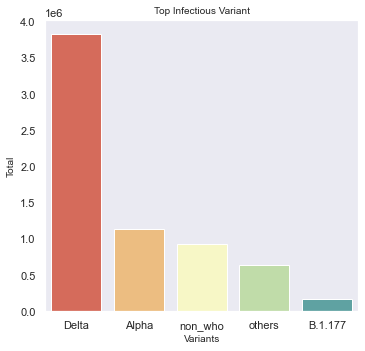

In [103]:
#Graph of Top Infectious Variant
plt.figure(figsize=(5,5))
sns.barplot(x="variant", y="num_sequences",palette="Spectral", data=Assigning_Variants)
sns.set_theme(style="dark")
plt.xlabel('Variants',fontsize = 10)
plt.ylabel('Total',fontsize = 10)
plt.title('Top Infectious Variant',fontsize=10)
plt.show()


In [119]:
#Corona Rate India
Only_India = df[df['location']=='India']
Only_India.groupby(['date']).sum()
RIT = Only_India.reset_index()
RIT

,index,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,36360,India,2020-05-11,Alpha,0,0.00,471
1,36361,India,2020-05-11,B.1.1.277,0,0.00,471
2,36362,India,2020-05-11,B.1.1.302,0,0.00,471
3,36363,India,2020-05-11,B.1.1.519,0,0.00,471
4,36364,India,2020-05-11,B.1.160,0,0.00,471
...,...,...,...,...,...,...,...
1051,37411,India,2021-12-27,Omicron,174,34.87,499
1052,37412,India,2021-12-27,S:677H.Robin1,0,0.00,499
1053,37413,India,2021-12-27,S:677P.Pelican,0,0.00,499
1054,37414,India,2021-12-27,others,21,4.21,499


Text(0, 0.5, 'Number')

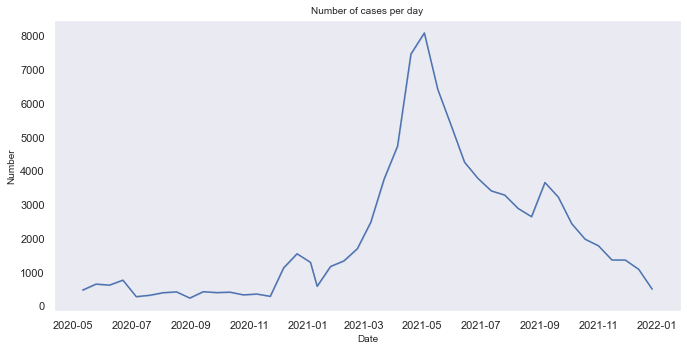

In [122]:
#Coverting Date Time
RIT['date'] = pd.to_datetime(RIT['date'])
plt.figure(figsize=(10,5))
sns.lineplot(x='date', y='num_sequences_total',data=RIT)
plt.title("Number of cases per day", fontsize=10)
plt.xlabel("Date", fontsize = 10)
plt.ylabel("Number", fontsize = 10)